# Introduction to NetworkX

## F. Mráz

NetworkX is a Python package for modeling, analyzing, and visializing networks

* several types of networks
* several algorithms for network analysis
* read/write networks in many formats

Documentation:  <https://networkx.github.io/documentation/stable/>

At first, we must import the module networkx

In [1]:
import networkx as nx

## Creating Simple Graphs 

In [2]:
# create an undirected graph (network)
G = nx.Graph()

The graph can have an arbitrary additional information.

In [7]:
G.name = "The first simple graph"
G.dsfsdfds = "dbbbdasfdsa"
G

In [9]:
G.name

'The first simple graph'

## Nodes

Nodes in graphs manipulated with networkx can be arbitrary objects that are hashable. Most commnon are *numbers* and  *strings*.

In [9]:
# adding one node at a time
G.add_node(1)
G.add_node(2)

# adding several nodes at once
G.add_nodes_from([3,4,5,6])

G.nodes

NodeView((1, 2, 3, 4, 5, 6))

The argument `X` in `nx.add_nodes_from(X)` can be any iterable container.

Even a graph can be a node!

## Edges

In [10]:
# ading edeges one at a time
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e)    # unpack the tuple e

# adding several edges at once
G.add_edges_from([(3,4),(4,5),(5,6),(6,1)])

G.edges

EdgeView([(1, 2), (1, 6), (2, 3), (3, 4), (4, 5), (5, 6)])

The argument E in nx.add_nodes_from(E) can be any iterable container of edge-tuples. An edge-tuple can be
* a 2-tuple - `(node`$_1$ `,node`$_2$ `)`
* a 3-tuple - `(node`$_1$ `,node`$_2$ `, dc)`, where `dc` is a dictionary of edge attributes.

In [11]:
G.add_edge(1,2,weight=2.1)
G.add_edges_from([(2,3,{'weight':1.0}), (3,4,{'weight': 3.9})  ])
G.edges

EdgeView([(1, 2), (1, 6), (2, 3), (3, 4), (4, 5), (5, 6)])

### Notes

* Adding existing nodes is no error
* Adding existing edges is no error
* Even a graph can be a node!
* any edge and node can have an arbitrary number of atributes

In [12]:
G.nodes[1]['name'] = "A"
G.nodes[2]['name'] = "B"
G.add_node(3,name = "C")
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [13]:
list(G.nodes)

[1, 2, 3, 4, 5, 6]

In [14]:
G.nodes[1]

{'name': 'A'}

In [15]:
G.nodes.data()

NodeDataView({1: {'name': 'A'}, 2: {'name': 'B'}, 3: {'name': 'C'}, 4: {}, 5: {}, 6: {}})

## Removing Nodes and Edges

In [16]:
G.remove_edge(1,6)
G.remove_edges_from([(4,5),(5,6)])
G.remove_node(4)
G.remove_nodes_from([5,6])
print(list(G.nodes))
print(list(G.edges))

[1, 2, 3]
[(1, 2), (2, 3)]


## Accessing Nodes and Edges

In [18]:
G.clear()              # clear everything from G
G.add_edges_from([(1,2,{'weight':1.0}), (2,3,{'weight':2.0}), (1,3,{'weight':1.5}), 
                  (3,4,{'weight':2.0})])
print('Nodes:',list(G.nodes))
print('Edges:',list(G.edges))

G[1]   # this is a view on the neighbors of node 1


Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 3), (2, 3), (3, 4)]


AtlasView({2: {'weight': 1.0}, 3: {'weight': 1.5}})

In [19]:
G.adj

AdjacencyView({1: {2: {'weight': 1.0}, 3: {'weight': 1.5}}, 2: {1: {'weight': 1.0}, 3: {'weight': 2.0}}, 3: {2: {'weight': 2.0}, 1: {'weight': 1.5}, 4: {'weight': 2.0}}, 4: {3: {'weight': 2.0}}})

In [20]:
G.adj[1]

AtlasView({2: {'weight': 1.0}, 3: {'weight': 1.5}})

In [21]:
G[1][2]

{'weight': 1.0}

In [22]:
G.edges[1,2]

{'weight': 1.0}

In [23]:
G.edges[1,2]['color'] = "blue"
G[2][3]['color'] = "red"
G[2]

AtlasView({1: {'weight': 1.0, 'color': 'blue'}, 3: {'weight': 2.0, 'color': 'red'}})

In [24]:
list(G.adjacency())

[(1, {2: {'weight': 1.0, 'color': 'blue'}, 3: {'weight': 1.5}}),
 (2,
  {1: {'weight': 1.0, 'color': 'blue'}, 3: {'weight': 2.0, 'color': 'red'}}),
 (3,
  {2: {'weight': 2.0, 'color': 'red'},
   1: {'weight': 1.5},
   4: {'weight': 2.0}}),
 (4, {3: {'weight': 2.0}})]

In [25]:
for (u,v,w) in G.edges.data('weight'):
    print('{}, {}, {}'.format(u,v,w))

1, 2, 1.0
1, 3, 1.5
2, 3, 2.0
3, 4, 2.0


## Atributes of Graphs, Nodes and Edges

Each grah, node and edge can have attributes that are stored in a associated attribute dictionary. Attributes are empty by default. 

### Graph Attributes

They can be added when creating a new graph

In [26]:
G = nx.Graph(time = '1pm')    
G.graph

{'time': '1pm'}

changed or added later

In [27]:
G.graph['time'] = '2pm'
print(G.graph)
G.graph['event'] = 'tournament'
G.graph

{'time': '2pm'}


{'time': '2pm', 'event': 'tournament'}

### Node attributes

In [28]:
G.add_node(1, name='Ethan')
G.add_nodes_from([3,4], team='Bulls')
G.nodes[1]

{'name': 'Ethan'}

In [29]:
G.nodes[1]['court'] = 4
G.nodes.data()

NodeDataView({1: {'name': 'Ethan', 'court': 4}, 3: {'team': 'Bulls'}, 4: {'team': 'Bulls'}})

**Warning:** Adding nodes to `G.nodes` does not add them to the graph. It is necessary to use `add_node()` or `add_nodes_from()`. Similarly for edges!

### Edge Attributes

In [30]:
G.add_edge(1, 2, round=1 )
G.add_edges_from([(3, 4), (4, 5)], round=2)
G.add_edges_from([(1, 2, {'round': 3}), (2, 3, {'time': '3pm'})])
G[1][2]['time'] = '2:30pm'
G.edges[3, 4]['time'] = '4pm'
list(G.adjacency())

[(1, {2: {'round': 3, 'time': '2:30pm'}}),
 (3, {4: {'round': 2, 'time': '4pm'}, 2: {'time': '3pm'}}),
 (4, {3: {'round': 2, 'time': '4pm'}, 5: {'round': 2}}),
 (2, {1: {'round': 3, 'time': '2:30pm'}, 3: {'time': '3pm'}}),
 (5, {4: {'round': 2}})]

### Edge Attributes (cont)

Attribute `weight` is special, as it is used by several algorithms implemented in `networkx`. Therefore the attribute `weight` must be numeric.

In [31]:
G[1][3]['weight'] = 2.3

KeyError: 3

Oops! What is the error? 
* G[1] ... dict of node 1
*  G[1][3] ... this dict does not contain node 3
* it is note even in the graph

Once again with the `weight` attribute

In [32]:
G.add_edge(1,2,weight=3.2)
G.add_weighted_edges_from([(2,3,1.2), (3,1,0.5)])
print(G.adj[2])
G[1][2]['weight'] = 2
print(G.adj[2])

{1: {'round': 3, 'time': '2:30pm', 'weight': 3.2}, 3: {'time': '3pm', 'weight': 1.2}}
{1: {'round': 3, 'time': '2:30pm', 'weight': 2}, 3: {'time': '3pm', 'weight': 1.2}}


## Directed Graphs

Directed graph are represented by the class `DiGraph` with some specific properties, like `DiGraph.out_edges()`, `Digraph.in_degree()`, `DiGraph.out_degree()`, `DiGraph.predecessors()`, `DiGraph.successors()`. Actually, the directed versions of `neighbors()` is equivalent to `successors()` while `degree` reports the sum of `in_degree` and `out_degree`. 

In [33]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

DG.degree(1, weight='weight')

node = 1
print('Node {} \n\thas successors {}\n\t predecessors {}'.format(
    node, list(DG.successors(node)), list(DG.predecessors(node))) 
     )

print('Neighbors of node {} are {}'.format(
    node, list(DG.neighbors(node)))  )

Node 1 
	has successors [2]
	 predecessors [3]
Neighbors of node 1 are [2]


## Drawing Graphs



In [34]:
import matplotlib.pyplot as plt

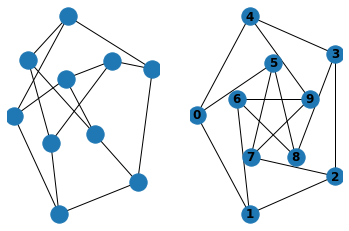

In [45]:
G = nx.petersen_graph()
plt.subplot(121)

#nx.draw(G, with_labels=True, font_weight='bold')
nx.draw(G)
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [42]:
%matplotlib inline

G = nx.petersen_graph()
plt.subplot(121)

#nx.draw(G, with_labels=True, font_weight='bold')
nx.draw(G)
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold',
              node_color="#00AAAA")

## Excercises

### 1. Construct a Simple Graph

Implement function `gener_house_graph()` that returns an undirected graph representing the following drawing

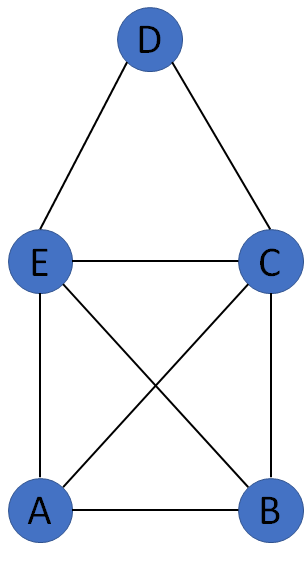

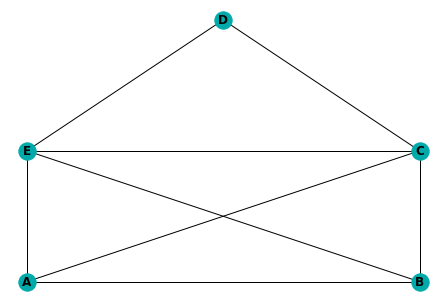

In [89]:
def gener_house_graph():
    G = nx.Graph()
    G.add_edges_from([("A","E"),("A","C"),("A","B"),("B","E"),("B","C"),("E","C"),("E","D"),("C","D"),])
    nx.fruchterman_reingold_layout(G)
    p = {"A" : (0,0), "B" : (1,0), "C" : (1,0.5), "D" : (0.5,1), "E" : (0,0.5)}
    pos =  nx.rescale_layout_dict(p)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color="#00AAAA")
gener_house_graph()

Implement the following functions, assume that graph is undirected if not said otherwise:

In [40]:
def compute_diameter(G):
    # returns the diameter of graph G
    pass

def compute_degrees(G):
    # returns list of degrees of node in G
    pass

def avg_degree(G):
    # return the average degree of nodes in G
    pass

def degree_histogram(G):
    # plot histogram of degrees of nodes in graph G
    pass

A center of a graph is a node where the maximum distance (number of edges) traversed to any other node is a minimum, compared to any other node. Essentially, the center of a graph is the most centrally located node. Note that there may be more than one node that qualifies as the center of the graph.

In [41]:
def centers(G):
    # return the list of all centers of graph G
    pass

def max_diameter_graph(Nodes):
    # return a graph with the set of nodes Nodes and maximal possible diameter
    pass

def min_diameter_graph(Nodes):
    # return a graph with the set of nodes Nodes and minimal diameter
    pass



In [43]:
def binomial_graph(N,prob):
    # generate graph with N nodes 1,...,N where the probability that a pair 
    # of nodes is connected by an edge is prob
    pass

def describe_graph(G):
    # print description of graph G. The description should list 
    # as many properties as possible. E.g., the number of nodes and edges,
    # average degree, standard deviation from the average, number and names of different 
    # attributes of nodes, of edges, etc.
    pass

In [ ]:
G = nkarate_club